# EDA

Exploratory data analysis for ATTEST dataset. Contains power data of 14 buses in the KPC region.

## Dataset setup

In [1]:
import pandas

total = pandas.read_csv('../datasets/kpc.csv', header=[0, 1])

## Visuals

### Per voltage level

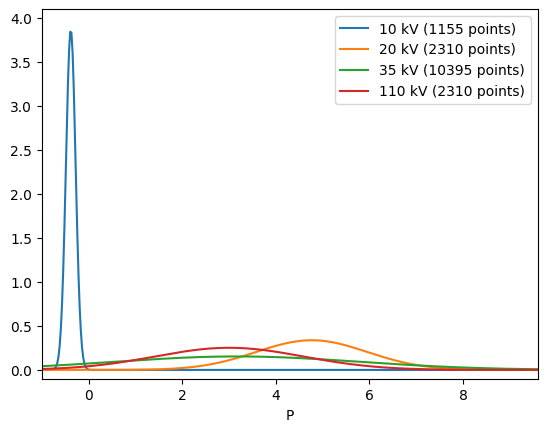

In [2]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy

voltage_levels = total.bus.voltage_level.unique()
for i, vn in enumerate(sorted(voltage_levels), 1):
    subdata = total[total.bus.voltage_level == vn]
    
    mu, sigma = subdata.goal.p.mean(), subdata.goal.p.std()
    x = numpy.linspace(-10, 15, 1000)
    ax = plt.plot(x, stats.norm.pdf(x, mu, sigma), label=f"{int(vn)} kV ({len(subdata)} points)")

plt.xlim((subdata.goal.p.min() - 1, subdata.goal.p.max() + 1))
plt.ylim((-0.1, 4.1))
plt.xlabel('P')
plt.legend()

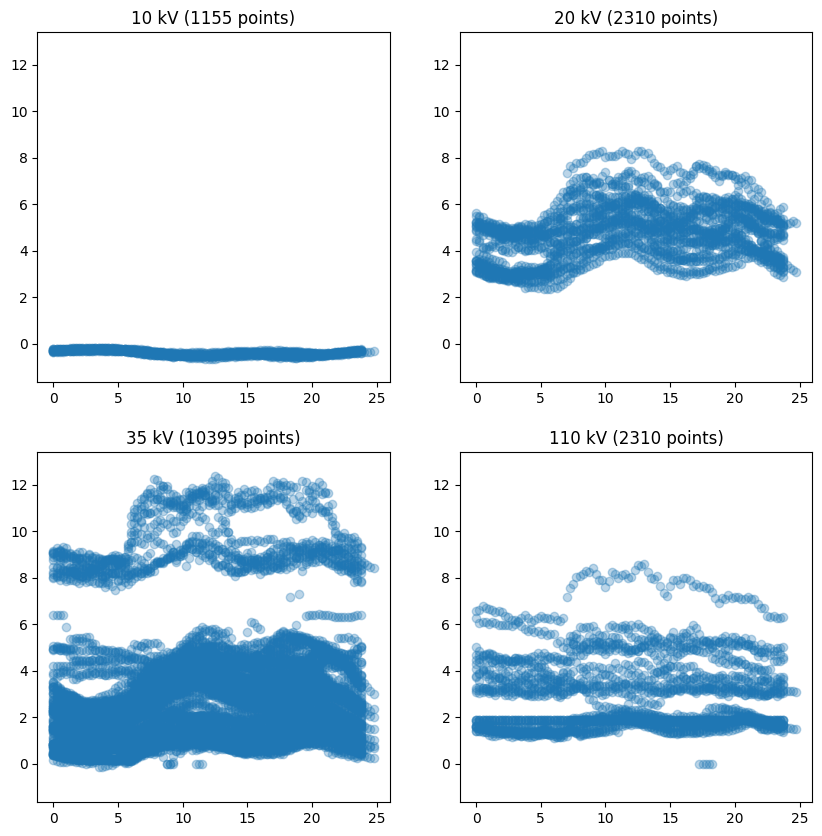

In [3]:
voltage_levels = total.bus.voltage_level.unique()
f = plt.figure(figsize=(10,10))
for i, vn in enumerate(sorted(voltage_levels), 1):
    subdata = total[total.bus.voltage_level == vn]
    
    ax = plt.subplot(2, len(voltage_levels) // 2, i)
    ax.set_title(f"{int(vn)} kV ({len(subdata)} points)")
    ax.set_ylim((total.goal.p.min() - 1, total.goal.p.max() + 1))
    ax.scatter(subdata.time.hour + subdata.time.minute / 60, subdata.goal.p, alpha=0.3)

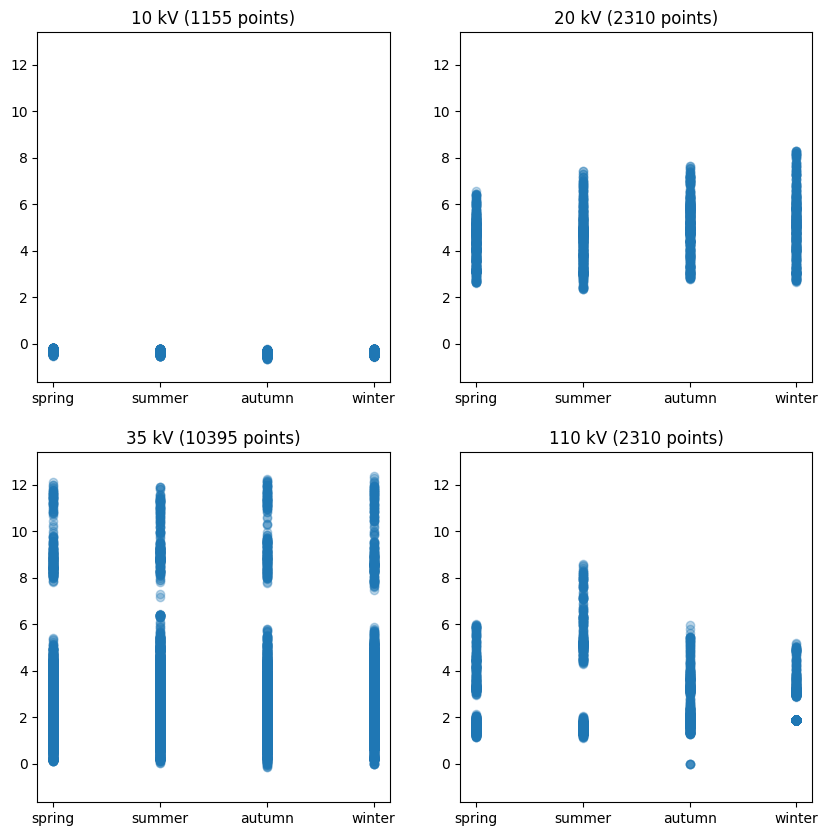

In [4]:
voltage_levels = total.bus.voltage_level.unique()
f = plt.figure(figsize=(10,10))
for i, vn in enumerate(sorted(voltage_levels), 1):
    subdata = total[total.bus.voltage_level == vn]
    
    ax = plt.subplot(2, len(voltage_levels) // 2, i)
    ax.set_title(f"{int(vn)} kV ({len(subdata)} points)")
    ax.set_ylim((total.goal.p.min() - 1, total.goal.p.max() + 1))
    domain = [numpy.where(s == 1)[0][0] for s in subdata.season.values]
    domain = [total.season.columns[x] for x in domain]
    ax.scatter(domain, subdata.goal.p, alpha=0.3)

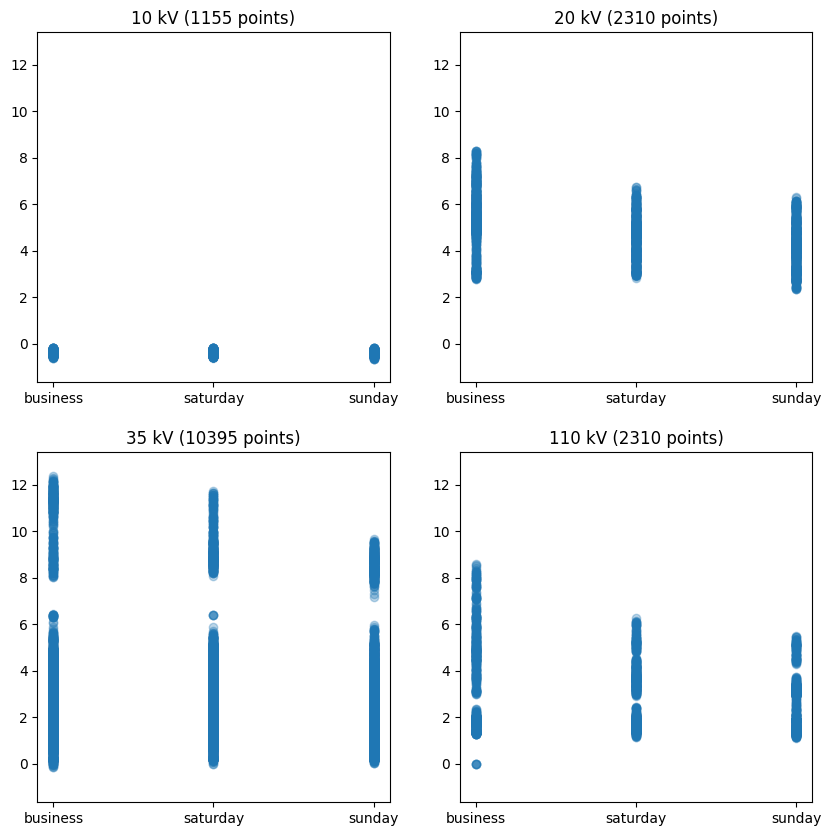

In [5]:
voltage_levels = total.bus.voltage_level.unique()
f = plt.figure(figsize=(10,10))
for i, vn in enumerate(sorted(voltage_levels), 1):
    subdata = total[total.bus.voltage_level == vn]
    
    ax = plt.subplot(2, len(voltage_levels) // 2, i)
    ax.set_title(f"{int(vn)} kV ({len(subdata)} points)")
    ax.set_ylim((total.goal.p.min() - 1, total.goal.p.max() + 1))
    domain = [numpy.where(s == 1)[0][0] for s in subdata.day.values]
    domain = [subdata.day.columns[x] for x in domain]
    ax.scatter(domain, subdata.goal.p, alpha=0.3)

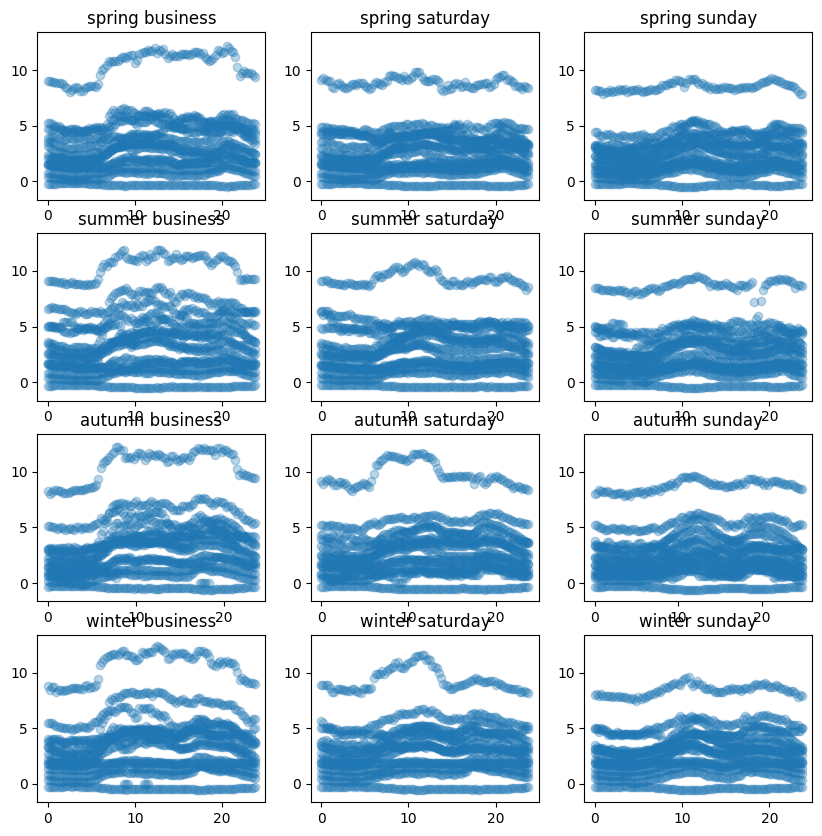

In [6]:
f = plt.figure(figsize=(10,10))

for i, season in enumerate(total.season.columns):
    for j, day in enumerate(total.day.columns):
        subdata = total[total.season[season] & total.day[day]]
    
        ax = plt.subplot(4, 3, i * len(total.day.columns) + j + 1)
        ax.set_title(f"{season} {day}")
        ax.set_ylim((total.goal.p.min() - 1, total.goal.p.max() + 1))
        ax.scatter(subdata.time.hour + subdata.time.minute / 60, subdata.goal.p, alpha=0.3)